In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [11]:
# Step 1: Preprocessing the Data (same as before)
file_path = "/content/drive/My Drive/Dataset/tsla.csv"
df = pd.read_csv(file_path)

# Feature selection
features = ['open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14', 'macd', 'bollinger']
df['price_direction'] = (df['next_day_close'] > df['close']).astype(int)  # 1: Price Up, 0: Price Down
df = df[features + ['price_direction']].dropna()

# Normalize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Create sequences for RNN
sequence_length = 30
X = []
y = []

for i in range(sequence_length, len(df)):
    X.append(df[features].iloc[i-sequence_length:i].values)
    y.append(df['price_direction'].iloc[i])

X, y = np.array(X), np.array(y)
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [12]:
# Step 2: Build the RNN Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.5184 - loss: 0.6941 - val_accuracy: 0.5503 - val_loss: 0.6866
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4940 - loss: 0.6940 - val_accuracy: 0.5427 - val_loss: 0.6882
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5347 - loss: 0.6910 - val_accuracy: 0.5302 - val_loss: 0.6897
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5080 - loss: 0.6932 - val_accuracy: 0.5251 - val_loss: 0.6920
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5140 - loss: 0.6922 - val_accuracy: 0.5176 - val_loss: 0.6926
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5157 - loss: 0.6912 - val_accuracy: 0.4975 - val_loss: 0.6959
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5097 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6934
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5488 - loss: 0.6890 - val_accuracy: 0.4397 - val_loss: 0.

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


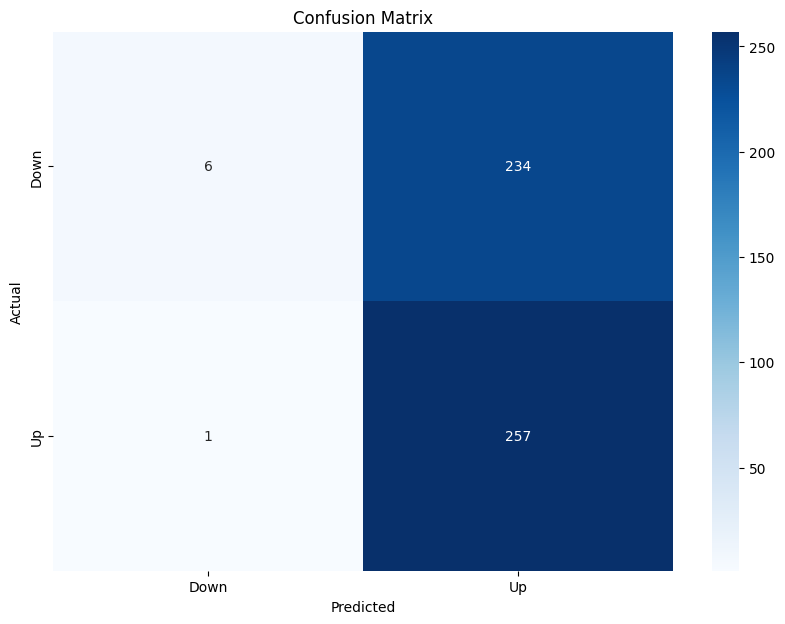

              precision    recall  f1-score   support

        Down       0.86      0.03      0.05       240
          Up       0.52      1.00      0.69       258

    accuracy                           0.53       498
   macro avg       0.69      0.51      0.37       498
weighted avg       0.68      0.53      0.38       498



In [13]:
# Step 3: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Down', 'Up'])
print(report)

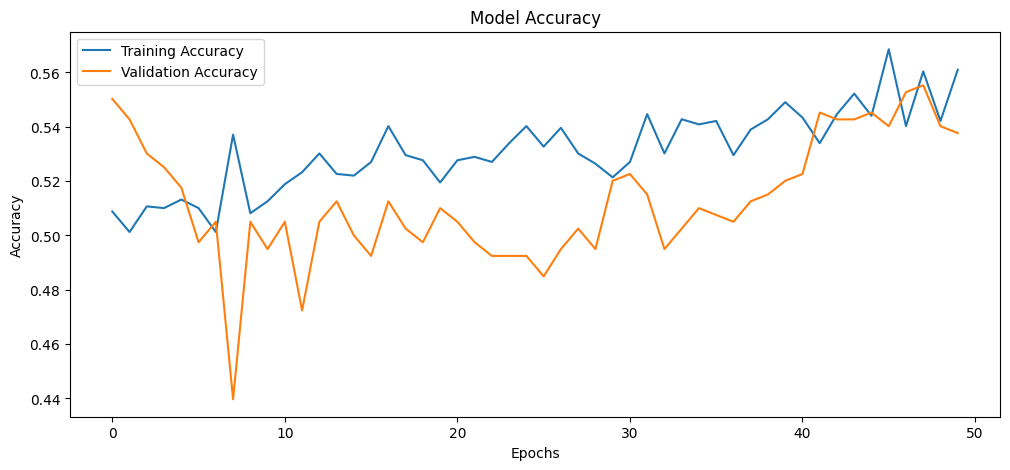

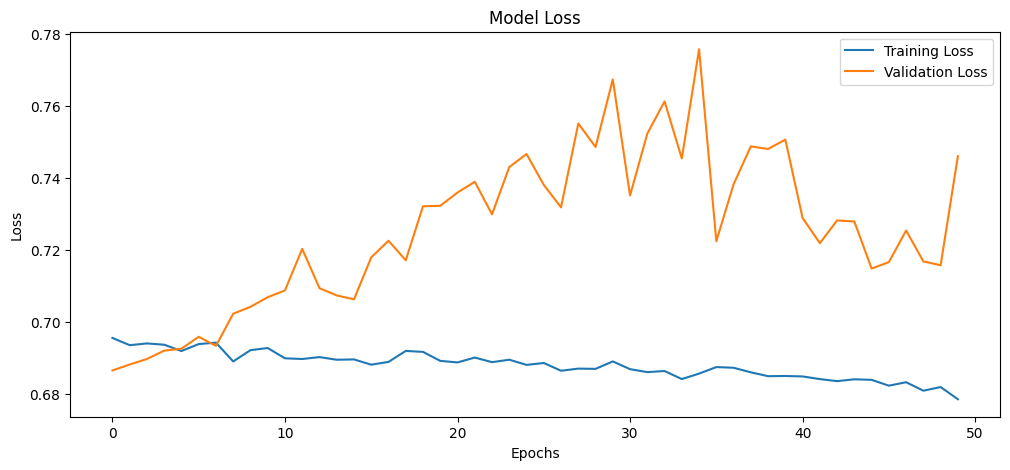

In [17]:
# Plot accuracy and loss curves for training and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
# Step 5: Save the Model
model.save('/content/drive/My Drive/tsla_model_classification.h5')
print("Model saved successfully! Please upload the code and model file to GitHub.")



Model saved successfully! Please upload the code and model file to GitHub.
